<div align="right">Python 2.7 Jupyter Notebook</div>

# Introduction to Bandicoot

### Your completion of the notebook exercises will be graded based on your ability to do the following: 

> **Understand**: Do your pseudo-code and comments show evidence that you recall and understand technical concepts?

> **Apply**: Are you able to execute code (using the supplied examples) that performs the required functionality on supplied or generated data sets? 

> **Evaluate**: Are you able to interpret the results and justify your interpretation based on the observed data?

#### Notebook objectives
By the end of this notebook, you will be expected to:

> - Understand the use of Bandicoot in automating the analysis of mobile phone data records; and
- Understand data error handling.
 
####  List of exercises
>   - **Exercise 1**: Calculating the number of call contacts.
  - **Exercise 2**: Determining average day and night weekly call activity rates.
  - **Exercise 3**: Interpreting gender assortativity values.
  - **Exercise 4**: Handling data errors.

# Notebook introduction

This course started by introducing you to tools and techniques that can be applied in analyzing data. This notebook briefly revisits the “Friends and Family” data set (for context purposes), before demonstrating how to generate summary statistics manually, and through Bandicoot. Subsequent sections briefly demonstrate Bandicoot's visualization capabilities, how to use Bandicoot in combination with network and graph content (introduced in Module 4), error handling, and loading files from a directory.


<div class="alert alert-warning">
<b>Note</b>:<br>
It is strongly recommended that you save and checkpoint after applying significant changes or completing exercises. This allows you to return the notebook to a previous state should you wish to do so. On the Jupyter menu, select "File", then "Save and Checkpoint" from the dropdown menu that appears.
</div>

#### Load libraries

In [1]:
import os
import pandas as pd
import bandicoot as bc
import numpy as np
import matplotlib

# 1. Data set review
 Some of the relevant information pertaining to the “Friends and Family” data set is repeated here, as you will be focusing on the content of the data in this module's notebooks.
 
An experiment was designed in 2011 to study how people make decisions (with emphasis on the social aspects involved) and how people can be empowered to make better decisions using personal and social tools. The data set was collected by Nadav Aharony, Wei Pan, Cory Ip, Inas Khayal, and Alex Pentland. More details about this data set are available through the [MIT Reality Commons resource](http://realitycommons.media.mit.edu/friendsdataset.html).

The subjects are members of a young-family, residential, living community adjacent to a major research university in North America. All members of the community are couples, and at least one of the members is affiliated with the university. The community comprises over 400 residents, approximately half of whom have children. A pilot phase of 55 participants was launched in March 2010. In September 2010, phase two of the study included 130 participants – approximately 64 families. Participants were selected out of approximately 200 applicants in a way that would achieve a representative sample of the community and sub-communities (Aharony et al. 2011).

In this module, you will prepare and analyze the data in a social context, using tools and methods introduced in previous modules.

# 2. Calculating summary statistics
To better understand the process of creating features (referred to as behavioral indicators in Bandicoot), you will start by manually creating a feature. Creating features is a tedious process. Using libraries that are tailored for specific domains (such as Bandicoot) can significantly reduce the time required to generate features that you would use as input in machine-learning algorithms. It is important for you to both understand the process and ensure that the results produced by the libraries are as expected. In other words, you need to make sure that you use the correct function from the library to produce the expected results.
## 2.1 Average weekly call duration

In the first demonstration of automated analysis using Bandicoot, you will evaluate the average weekly call duration for a specific user, based on the interaction log file.


#### 2.1.1 Data preparation

First, review the content of the text file containing the records using the “bash” command head. This function has been demonstrated in earlier notebooks, and it is extremely useful when you need to get a quick view of a data set without loading it into your analysis environment. Should the contents prove useful, you can load it as a DataFrame.

In [2]:
# Retrieve the first three rows from the "clean_records" data set.
!head -n 3 ../data/bandicoot/clean_records/fa10-01-08.csv

interaction,direction,correspondent_id,datetime,call_duration
text,out,fa10-01-08,2010-08-20 17:34:22,
text,in,bd7c809d7d47026e7390ba3c6b253d24efcbe8cf,2010-09-08 11:12:05,


The first three lines of the file are displayed.  They contain a header row, as well as two data rows.

Next, load the data set using the Pandas "`read_csv`" function, and use the "datetime" field as the DataFrame index. This example only focuses on calls.  You will create a new DataFrame containing only call data by filtering by the type of interaction.

In [3]:
# Specify the user for review.
user_id = 'sp10-01-08'

# Load the data set and set the index.
interactions = pd.read_csv('../data/bandicoot/clean_records/' + user_id + '.csv')
interactions.set_index(pd.DatetimeIndex(interactions['datetime']), inplace=True)

# Extract the calls. 
calls = interactions[interactions.interaction == 'call'].copy()

# Display the head of the new calls dataframe.
calls.head(3)

,interaction,direction,correspondent_id,datetime,call_duration
2011-02-16 15:28:27,call,out,fa10-01-04,2011-02-16 15:28:27,58.0
2011-02-16 20:05:33,call,out,906fad226144b8d883211608d1f9642f6c584299,2011-02-16 20:05:33,42.0
2011-02-16 20:29:59,call,in,906fad226144b8d883211608d1f9642f6c584299,2011-02-16 20:29:59,365.0


The "correspondent_id" field contains the user ID for the other party involved in a specific call interaction. Each "correpondent_id" is encoded in one of two formats: 
1. A hexadecimal integer that indicates the corresponding party did not form part of the study.
2. A non-hexadecimal (string) data type for a party within the study group. 

The provided function below, "``is_hex``", checks if a string is hexadecimal or not.

In [4]:
def is_hex(s):
    '''
    Check if a string is hexadecimal.
    '''
    try:
        int(s, 16)
        return True
    except ValueError:
        return False

Add a column that returns a Boolean indicating whether the value of "correspondent_id" is a hexadecimal or not, using the function defined above. This column can be used to filter interactions that only involve those users in the study population. 

In [5]:
calls['is_hex_correspondent_id'] = calls.correspondent_id.apply(lambda x: is_hex(x)).values

In [6]:
calls.head()

,interaction,direction,correspondent_id,datetime,call_duration,is_hex_correspondent_id
2011-02-16 15:28:27,call,out,fa10-01-04,2011-02-16 15:28:27,58.0,False
2011-02-16 20:05:33,call,out,906fad226144b8d883211608d1f9642f6c584299,2011-02-16 20:05:33,42.0,True
2011-02-16 20:29:59,call,in,906fad226144b8d883211608d1f9642f6c584299,2011-02-16 20:29:59,365.0,True
2011-02-16 20:55:06,call,in,caf86d3d59c0866ac05cde465cffc2056e3cf441,2011-02-16 20:55:06,0.0,True
2011-02-16 21:12:25,call,out,fa10-01-04,2011-02-16 21:12:25,172.0,False


#### 2.1.2 Calculating the weekly average call duration

Performing the calculation is a two-step process:
1. Attribute each call that has the value for the week the interaction occurred to the variable "week". 
> **Note**: This is possible, in this case, because the data  range is within a specific year. Otherwise, you would have attributed the call to both the year and the week the interaction occurred.
2. Use the Pandas "``pd.group_by()``" method (demonstrated in Module 2) to bin the data on the basis of the week of interaction.

In [7]:
# Add a field that contains the week number corresponding to a call record. 
calls['week'] = calls.index.week

# Get the mean and population(ddof=0) standard deviation of each grouping.
weekly_averages = calls.groupby('week')['call_duration'].agg([np.mean, lambda x: np.std(x, ddof=0)])

# Give the columns names that are intuitive.
weekly_averages.columns = ['mean_duration', 'std_duration']

# Review the data.
weekly_averages.head()

,mean_duration,std_duration
week,,
7,89.076923,106.805691
8,50.891892,57.033316
9,58.950000,57.964192
11,129.750000,160.824244
12,95.340000,143.375676


In [8]:
# Retrieve the bins (weeks).
list(weekly_averages.index)

[7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

Now that you have the weekly averages and standard deviation of the call duration, you can compute the mean weekly call duration and the mean weekly call duration standard deviation.

In [9]:
print ("The average weekly call duration for the user is {:.3f}, while the average weekly standard deviation is {:.3f}."
       .format(weekly_averages.mean_duration.mean(), weekly_averages.std_duration.mean()))

The average weekly call duration for the user is 78.536, while the average weekly standard deviation is 123.400.


It is possible to use generic data analysis libraries (such as Pandas) that were introduced to you in earlier modules. However, in the next section of this notebook, you will return to a library briefly introduced to you in Module 2 of this course, namely Bandicoot.

In [10]:
weekly_averages.describe()

,mean_duration,std_duration
count,14.000000,14.000000
mean,78.535608,123.400028
std,22.871163,67.149227
min,47.969697,55.472890
25%,62.004365,81.833478
50%,76.884146,106.724466
75%,88.737179,148.623888
max,129.750000,281.684580


## 2.2 Using Bandicoot
[Bandicoot](http://bandicoot.mit.edu/docs/index.html) is an open-source Python toolbox used to analyze mobile phone metadata. You can perform actions – similar to your manual steps – with a single command, using this library. 

The manual analysis of data sets can be an extremely tedious and resource-intensive process. Although it is outside of the scope of this course, it is important to start considering memory utilization, reproducibility of results, and the reuse of intermediate steps when working with large data sets. Toolboxes, such as Bandicoot, are optimized for improved performance,  and specific to mobile phone metadata analysis, meaning that the functions available are specific to the type of data to be analyzed.

Please review the [Bandicoot reference manual](http://bandicoot.mit.edu/docs/reference/index.html) for details on functions, modules, and objects included in Bandicoot. Bandicoot has been preinstalled on your virtual analysis environment. Revisit the [Bandicoot quick guide](http://bandicoot.mit.edu/docs/quickstart.html) should you wish to set up this library in another environment.

In the following example, you will redo the analysis from the previous section, and work on additional examples of data manipulation using Bandicoot.

#### Load the data
This example starts with using the Bandicoot “import” function to load the input files. Note that the “import” function expects data in a specific format, and it provides additional information that allows you to better understand your data set.

In [11]:
B = bc.read_csv(user_id, '../data/bandicoot/clean_records/', '../data/bandicoot/antennas.csv')

[x] 3018 records from 2010-07-23 10:02:55 to 2011-05-27 16:23:21
[x] 95 contacts
[ ] No attribute stored
[x] 27 antennas
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network


> **Note**:

> ```WARNING:root:100.00% of the records are missing a location.```

> This message indicates that our data set does not include any antenna IDs. This column was removed from the DataFrame in order to preserve user privacy. A research study on the [privacy bounds of human mobility](http://www.nature.com/articles/srep01376/) indicated that knowing four spatio-temporal points (approximate places and times of an individual) is enough to re-identify an individual in an anonymized data set in 95% of the cases.


### 2.2.1 Compute the weekly average call duration
In Bandicoot, you can achieve the same result demonstrated earlier with a single method call named "[call_duration](http://bandicoot.mit.edu/docs/reference/generated/bandicoot.individual.call_duration.html)".

In [12]:
# Calculate the call_duration summary statistics using Bandicoot.
bc.individual.call_duration(B)

{
    "allweek": {
        "allday": {
            "call": {
                "mean": {
                    "mean": 78.53560794244065, 
                    "std": 22.039203979301334
                }, 
                "std": {
                    "mean": 123.40002832412657, 
                    "std": 64.70661423960068
                }
            }
        }
    }
}

You can see that the results (above) are in line with the manual calculation (which was rounded to five decimals) that you performed earlier.
By default, Bandicoot computes indicators on a weekly basis, and returns the average (mean) over all of the weeks available, and the standard deviation (std), in a nested dictionary. You can read more about the [creation of indicators](http://bandicoot.mit.edu/docs/quickstart.html#computing-indicators) in the Bandicoot documentation.
The screenshot below demonstrates the format of the output produced.
![Screenshot of bandicoot weekly patterns for call duration](bandicoot-training-master/mini-mockups-02.png "Screenshot of bandicoot weekly patterns for call duration.")

To change the default behavior, and review the daily resolution, you can use “groupby”, in Bandicoot, as a method call argument. Other grouping parameters include "month", "year", and “None”.
Now, change the grouping resolution to "day", in the following call, and display a summary of additional statistics by including a parameter for the summary argument.

In [13]:
bc.individual.call_duration(B, groupby='day', interaction='call', summary='extended')

{
    "allweek": {
        "allday": {
            "call": {
                "mean": {
                    "mean": 64.60487040060214, 
                    "std": 38.88886397177002
                }, 
                "std": {
                    "mean": 71.27957421293777, 
                    "std": 75.43950476977011
                }, 
                "median": {
                    "mean": 40.18292682926829, 
                    "std": 25.307199423349523
                }, 
                "skewness": {
                    "mean": 0.7950038691706697, 
                    "std": 0.9017034751166386
                }, 
                "kurtosis": {
                    "mean": 2.7993518047575847, 
                    "std": 2.4264955228944887
                }, 
                "min": {
                    "mean": 9.024390243902438, 
                    "std": 17.071567869010913
                }, 
                "max": {
                    "mean": 229.64634146341464, 
                 

> **Note**:
    
> You will notice that you can switch between groupings by day, week, or month with ease. This is one of the advantages referred to earlier. In cases where you manually analyze the data, you would have had to manually create these features, or utilize  much more resource-intensive parsing functions in order to achieve similar results. You can choose to include all options or change to a new grouping with minimal changes required from your side, and no additional functions needing to be created.

<br>
<div class="alert alert-info">
<b>Exercise 1 Start.</b>
</div>

### Instructions

> 1. Compute the average **number of call contacts** for data set, B, grouped by:
      1. Month; and
      2. Week.

> **Hint**: You can review the help file for the "[number_of_contacts](http://bandicoot.mit.edu/docs/reference/generated/bandicoot.individual.number_of_contacts.html#bandicoot.individual.number_of_contacts)" function to get started.

In [ ]:
# Your code here.

#### the syntax is here:
bandicoot.individual.number_of_contacts(user, groupby='week', interaction=['call', 'text'], summary='default', split_week=False, split_day=False, datatype=None, direction=None, more=0)

In [54]:
# I will do the groupby for month
num_mth = bc.individual.number_of_contacts(B, groupby='month',interaction='call')
num_mth

{
    "allweek": {
        "allday": {
            "call": {
                "mean": 24.0, 
                "std": 5.244044240850758
            }
        }
    }
}

In [55]:
# Now I will do the groupby for week
num_week = bc.individual.number_of_contacts(B, groupby='week',interaction='call')
num_week

{
    "allweek": {
        "allday": {
            "call": {
                "mean": 10.857142857142858, 
                "std": 3.4404555939406554
            }
        }
    }
}

In [76]:
# .. and display the desired results in a nice string print
print ("The average number of call contacts grouped by month is: {:.2f}"
       .format(num_mth['allweek']['allday']['call']['mean']))
print ("The average number of call contacts grouped by week  is: {:.2f}"
       .format(num_week['allweek']['allday']['call']['mean']))

The average number of call contacts grouped by month is: 24.00
The average number of call contacts grouped by week  is: 10.86


<br>
<div class="alert alert-info">
<b>Exercise 1 End.</b>
</div>

> **Exercise complete**:
    
> This is a good time to "Save and Checkpoint".

### 2.2.2 Splitting records
Regardless of the grouping time resolution, it is often useful to stratify the data between weekday and weekend, or day and night. Bandicoot allows you to achieve this with its Boolean split arguments, "split_week" and "split_day". You can read more about Bandicoot’s "[number_of_interactions](http://bandicoot.mit.edu/docs/reference/generated/bandicoot.individual.number_of_interactions.html)", and then execute the code below to view the data on the daily number of interactions stratified with "split_week". 

> **Note**: 

> This strategy is employed to generate features to be processed by machine learning algorithms, where the algorithms can identify behavior which is not visible at small scale. In 2015, a study, titled "[Predicting Gender from Mobile Phone Metadata](https://docs.google.com/presentation/d/1gdPju5QW1bsjnZuTdqZEhCP-SbyJ1J8JleXaqkD8s2c/edit?usp=sharing)" (presented at the Netmob Conference, Cambridge), showed that the most predictive feature for men in a South Asian country is the "percent of calls initiated by the person during weekend nights", while the most predictive feature for men in the European Union is "the maximum text response delay during the week" (Jahani et al. 2015).

> <img src="Gender_features.png" alt="Drawing" style="width: 500px;"/>


In [14]:
# Use bandicoot to split the records by day.
bc.individual.number_of_interactions(B, groupby='day', split_day=True, interaction='call')

{
    "allweek": {
        "allday": {
            "call": {
                "mean": 6.2560975609756095, 
                "std": 4.119587285774633
            }
        }, 
        "day": {
            "call": {
                "mean": 4.8076923076923075, 
                "std": 3.1462541517456484
            }
        }, 
        "night": {
            "call": {
                "mean": 2.3793103448275863, 
                "std": 1.9811837823756178
            }
        }
    }
}

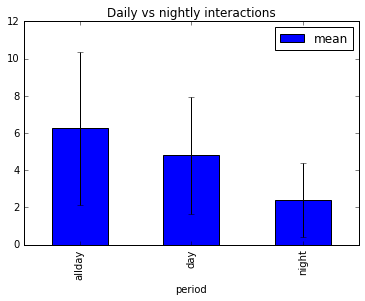

In [15]:
# Plot the results. The mean is plotted as a barplot, with the std deviation as an error bar.
%matplotlib inline

interactions_split_by_day = bc.individual.number_of_interactions(B, groupby='day', split_day=True, interaction='call')

interactions_split = []
for period, values in interactions_split_by_day['allweek'].items():
    interactions_split.append([period, values['call']['mean'], values['call']['std']])

interactions_split = pd.DataFrame(interactions_split,columns=['period', 'mean','std'])    
interactions_split[['period', 'mean']].plot(kind='bar' , x='period', title='Daily vs nightly interactions',
                                            yerr=interactions_split['std'].values, )

The argument "`split_day`" is now demonstrated (below) to allow you to view all available strata.

In [16]:
bc.individual.number_of_interactions(B, groupby='day', split_week=True, split_day=True, interaction='call')

{
    "allweek": {
        "allday": {
            "call": {
                "mean": 6.2560975609756095, 
                "std": 4.119587285774633
            }
        }, 
        "day": {
            "call": {
                "mean": 4.8076923076923075, 
                "std": 3.1462541517456484
            }
        }, 
        "night": {
            "call": {
                "mean": 2.3793103448275863, 
                "std": 1.9811837823756178
            }
        }
    }, 
    "weekday": {
        "allday": {
            "call": {
                "mean": 6.5, 
                "std": 3.947573094109004
            }
        }, 
        "day": {
            "call": {
                "mean": 4.964912280701754, 
                "std": 3.1453943622477163
            }
        }, 
        "night": {
            "call": {
                "mean": 2.276595744680851, 
                "std": 1.5804945046189909
            }
        }
    }, 
    "weekend": {
        "allday": {
            

> **Note**:

> The number of interactions is higher for “day” compared to “night”, as well as for “weekday” compared to “weekend”. 

### 2.2.3 Other indicators
Machine learning algorithms use features for prediction and clustering tasks. Difficulty arises when manually generating these features. However, using custom libraries (such as Bandicoot) to generate them on your behalf can significantly speed up and standardize the process. In earlier modules, you performed manual checks on data quality. Experience will teach you that this step always takes longer than anticipated, and requires significant effort to determine the relevant questions, and then to execute them. Using a standardized library such as Bandicoot saves time in analyzing data sets, and spotting data quality issues, and makes the actions repeatable or comparable with other data sets or analyses.

Two additional features are demonstrated here. You can refer to the Bandicoot reference material for additional available features.

#### Active days (days with at least one interaction)

In [17]:
# Active days.
bc.individual.active_days(B)

{
    "allweek": {
        "allday": {
            "callandtext": {
                "mean": 6.068181818181818, 
                "std": 1.3211174208485112
            }
        }
    }
}

> **Note**: 

> Remember that Bandicoot defaults to grouping by week, if the grouping is not explicitly specified.

#### Number of contacts
This number can be interesting, as some research suggests that it is predictable for humans, and that, in the long run, it is near constant for any individual. Review the following articles for additional information:
- [Your Brain Limits You to Just Five BFFs](https://www.technologyreview.com/s/601369/your-brain-limits-you-to-just-five-bffs/)
- [Limited communication capacity unveils strategies for human interaction](http://www.nature.com/articles/srep01950)

In [18]:
# Number of contacts. 
bc.individual.number_of_contacts(B, split_week=True)

{
    "allweek": {
        "allday": {
            "call": {
                "mean": 10.857142857142858, 
                "std": 3.4404555939406554
            }, 
            "text": {
                "mean": 6.5, 
                "std": 2.2309802166923687
            }
        }
    }, 
    "weekday": {
        "allday": {
            "call": {
                "mean": 9.384615384615385, 
                "std": 2.020603928702107
            }, 
            "text": {
                "mean": 5.604651162790698, 
                "std": 1.7932630370843723
            }
        }
    }, 
    "weekend": {
        "allday": {
            "call": {
                "mean": 4.3076923076923075, 
                "std": 2.16207220347003
            }, 
            "text": {
                "mean": 3.225, 
                "std": 1.8505066873697054
            }
        }
    }
}

> **Note**:

> It appears as though there might be a difference between the number of people contacted by phone between the weekend and weekdays.

#### All available features
Bandicoot currently contains 1442 features. You can obtain a quick overview of the features for this data set using the Bandicoot "[utils.all](http://bandicoot.mit.edu/docs/reference/generated/bandicoot.utils.all.html#bandicoot.utils.all)" function. The three categories of indicators are individual, spatial, and network-related features.

In [19]:
bc.utils.all(B)

{
    "name": "sp10-01-08", 
    "reporting": {
        "antennas_path": "../data/bandicoot/antennas.csv", 
        "attributes_path": None, 
        "recharges_path": None, 
        "version": "0.5.3", 
        "code_signature": "9448acf6f41035dc77ec1442688b811e522ffb4d", 
        "groupby": "week", 
        "split_week": false, 
        "split_day": false, 
        "start_time": "2010-07-23 10:02:55", 
        "end_time": "2011-05-27 16:23:21", 
        "night_start": "19:00:00", 
        "night_end": "07:00:00", 
        "weekend": [
            6, 
            7
        ], 
        "number_of_records": 3018, 
        "number_of_antennas": 27, 
        "number_of_recharges": 0, 
        "bins": 45, 
        "bins_with_data": 44, 
        "bins_without_data": 1, 
        "has_call": true, 
        "has_text": true, 
        "has_home": true, 
        "has_recharges": false, 
        "has_attributes": false, 
        "has_network": false, 
        "percent_records_missing_location": 1

> **Note**:

> The “reporting” variables allow you to better understand the nature and origin of the data, as well as which computations have been performed (which version of the code, etc.). 

<br>
<div class="alert alert-info">
<b>Exercise 2 Start.</b>
</div>

### Instructions

> 1. Using Bandicoot, find the user activity rate during the week and on weekends. Show your calculations and express your answer as a percentage using the print statement. 
>> **Note**: Five days constitute the maximum number of weekdays, and two days are the maximum possible number of weekend days.

In [20]:
# Number of active days will include both calls and text interactions
num_act_days = bc.individual.active_days(B, split_week=True)
num_act_days

{
    "allweek": {
        "allday": {
            "callandtext": {
                "mean": 6.068181818181818, 
                "std": 1.3211174208485112
            }
        }
    }, 
    "weekday": {
        "allday": {
            "callandtext": {
                "mean": 4.604651162790698, 
                "std": 0.7817551773940277
            }
        }
    }, 
    "weekend": {
        "allday": {
            "callandtext": {
                "mean": 1.6829268292682926, 
                "std": 0.46533619581314434
            }
        }
    }
}

In [21]:
# the user activity rate during the weekday will need to divide weekday rate by 5 days
weekdayrate = (num_act_days['weekday']['allday']['callandtext']['mean']/5*100)

In [22]:
# the user activity rate during the weekend will need to divide weekend rate by 2 days
weekendrate = (num_act_days['weekend']['allday']['callandtext']['mean']/2*100)

In [24]:
# .. and display the desired results in a nice string print
print ("User activity rate during the weekday is: {:.2f}%"
       .format(weekdayrate))
print ("User activity rate during the weekend is: {:.2f}%"
       .format(weekendrate))

User activity rate during the weekday is: 92.09%
User activity rate during the weekend is: 84.15%


<br>
<div class="alert alert-info">
<b>Exercise 2 End.</b>
</div>

> **Exercise complete**:
    
> This is a good time to "Save and Checkpoint".

# 3. Visualization with Bandicoot

Now that you have more background information on the toolbox and its capabilities, the visualization demonstrated in Module 2 will be repeated. As Yves-Alexandre de Montjoye mentioned in the video content, visualization is a powerful tool. This is not only with regard to communicating your final results, but also in terms of checking the validity of your data, in order to identify errors and outliers. Bandicoot is also a powerful tool when used in visually identifying useful patterns that are hidden by the aggregation processes applied to the raw data.

In [78]:
# Import the relevant libraries.
import os
from IPython.display import IFrame

# Set the path to store the visualization.
viz_path = os.path.dirname(os.path.realpath(__name__)) + '/viz'

# Create the visualization.
bc.visualization.export(B, viz_path)

# Display the visualization in a frame within this notebook.
IFrame("./viz/index.html", "100%", 700)

Successfully exported the visualization to /home/ubuntu/projects/module_5/viz


> **Note**:

> To serve the results in the notebook, "IFrame" is used. You can also serve the results as a web page using tools provided in Bandicoot. This function will not be demonstrated in this course, as the required ports on the AWS virtual analysis environment have not been opened.

> You can review the [Bandicoot quickstart guide](http://bandicoot.mit.edu/docs/quickstart.html#visualizing-a-user) for more details on the "bc.visualization.run(U)" command. You can use this function to serve the visualization as a web page if you choose to install bandicoot on infrastructure where you do have access to the default port (4242). (This port is not open on your AWS virtual analysis environment.)

> #### Thank you for these instructions - it will come in handy for my later use after the course.. :-)

# 4. Graphs and matrices

This section contains network indicators, a gender assortativity example, and a brief demonstration of how to use Bandicoot to generate input for visualizations, using NetworkX. At the start of the course, Professor Pentland described general patterns in behavior that are observed between individuals. Understanding an individual as a part of a network is an extremely useful way to evaluate how they resemble or do not resemble their friends, as well as the role they play in their network or community.

In the current “Friends and Family” data set, the majority of interactions take place outside of the population in the study. Therefore, performing the calculations on this data set does not make sense. This is because the data is not representative of the full network of contacts. In a commercial application, you would most likely encounter a similar situation as there are multiple carriers, each with only a portion of the total market share. The figures differ per country, but typically fall in the range of 10-30% market share for the main (dominant) carriers.
You need to prepare a separate, trimmed data set to demonstrate this example.

A useful feature of Bandicoot is that it analyzes a user's ego network, or individual focus node quickly, if the input data is properly formatted. Start by loading the "ego" in question to a Bandicoot object. You need to set the network parameter to "True". Bandicoot will attempt to extract all "ego" interaction data, and do the network analysis for the data contained in the specified network folder.

## 4.1 Load the data

In [82]:
# Specify the network folder containing all the data.
network_folder  = '../data/bandicoot/network_records/'

# Create Bandicoot object.
BN = bc.read_csv(user_id, network_folder, attributes_path='../data/bandicoot/attributes',network=True)

         call_duration: 356 record(s) with incomplete values
         No antennas file was given and records are using antennas for position.


[x] 1420 records from 2010-07-23 10:02:55 to 2011-05-27 14:44:21
[x] 7 contacts
[x] 2 attributes
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[ ] No calls
[x] Has network


The Bandicoot "read_csv()" function loads the data, provides summary information, and removes the records that are not of interest in the analysis.  Typically, performing the data cleansing steps is time-consuming, and prone to error or inconsistencies.

The graph data is stored as an adjacency matrix.

> **Note**:

> You will recall adjacency matrices (from Module 4) as a useful mechanism to represent finite graphs. Bandicoot stores graph information in an adjacency matrix, and said matrix indexes in a different object. Once the data has been loaded, you can start exploring the graph.

## 4.2 Network indicators

In [83]:
# Index of the adjacency matrix - user_ids participating in the network.
node_labels = bc.network.matrix_index(BN)
node_labels

['sp10-01-08',
 'fa10-01-14',
 'fa10-01-20',
 'sp10-01-07',
 'sp10-01-38',
 'sp10-01-39',
 'sp10-01-41',
 'sp10-01-49']

There are several types of adjacency matrices available in Bandicoot, including the following:

* `bc.network.matrix_directed_weighted(network_user)`
* `bc.network.matrix_directed_unweighted(network_user)`
* `bc.network.matrix_undirected_weighted(network_user)`
* `bc.network.matrix_undirected_unweighted(network_user)`

You can review the [Bandicoot network documentation](http://bandicoot.mit.edu/docs/reference/bandicoot.network.html) for additional information.

In [84]:
# Directed unweighted matrix.
directed_unweighted = bc.network.matrix_directed_unweighted(BN)
directed_unweighted

[[0, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 0, 0, 0, 1, 1, 1],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 1, 1, 0, 1, 0],
 [1, 0, 0, 1, 0, 1, 1, 0],
 [1, 1, 0, 1, 1, 0, 1, 1],
 [1, 1, 0, 0, 1, 1, 0, 1],
 [1, 1, 0, 1, 0, 1, 1, 0]]

In [85]:
# Undirected weighted matrix.
undirected_weighted = bc.network.matrix_undirected_weighted(BN)
undirected_weighted

[[0, 6, 7, 397, 6, 130, 8, 544],
 [6, 0, 0, 0, 0, 3, 10, 14],
 [7, 0, 0, 0, 0, 0, 0, 0],
 [397, 0, 0, 0, 56, 0, 0, 0],
 [6, 0, 0, 56, 0, 1052, 2, 0],
 [130, 3, 0, 0, 1052, 0, 27, 216],
 [8, 10, 0, 0, 2, 27, 0, 39],
 [544, 14, 0, 0, 0, 216, 39, 0]]

## 4.3 Gender assortativity
This indicator computes the assortativity of nominal attributes. More specifically, it measures the similarity of the current user to their correspondents for all Bandicoot indicators. For each one, it calculates the variance of the current user’s value with the values for all of their correspondents. This indicator measures the homophily of the current user with their correspondents, for each attribute. It returns a value between 0 (no assortativity) and 1 (all the contacts share the same value), which indicates the percentage of contacts sharing the same value.

Let's demonstrate this by reviewing the gender assortativity.

In [86]:
bc.network.assortativity_attributes(BN)['gender']

0.7142857142857143

<br>
<div class="alert alert-info">
<b>Exercise 3 Start.</b>
</div>

### Instructions

In the previous example, you obtained a value of 0.714 or 71.4% for gender assortativity. Random behavior would typically deliver a value centered around 50%, if you have enough data points. 

> **Question**: Do you think the value of 71.4% is meaningful or relevant?

> Your answer should consist of “Yes” or “No”, and a short description of what you think the value obtained means, in terms of the data set.

Your markdown answer here.

> ### YES !
>* We expect 'gender' data from a sample population to approximate to the central limit theorem, where the mean is 50.0%
>* What 71.4% tells me is that the data is biased towards one gender

<br>
<div class="alert alert-info">
<b>Exercise 3 End.</b>
</div>

> **Exercise complete**:
    
> This is a good time to "Save and Checkpoint".

## 4.4 Ego network visualization

You can use the ego network adjacency matrices for further analyses in NetworkX.

In [87]:
# Load the relevant libraries and set plotting options.
import networkx as nx
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (18,11)

Create directed unweighted and undirected weighted graphs to visualize  network, in order to better understand the user behavior (as per the examples in Section 1.2 of Module 4’s Notebook 2).

In [88]:
# Create the graph objects.
G_directed_unweighted = nx.from_numpy_matrix(np.array(directed_unweighted))
G_undirected_weighted = nx.from_numpy_matrix(np.array(undirected_weighted))
node_labels = dict(enumerate(node_labels))

#### 4.4.1 Plot the directed unweighted graph
This can typically be utilized to better understand the flow or spread of information in a network.

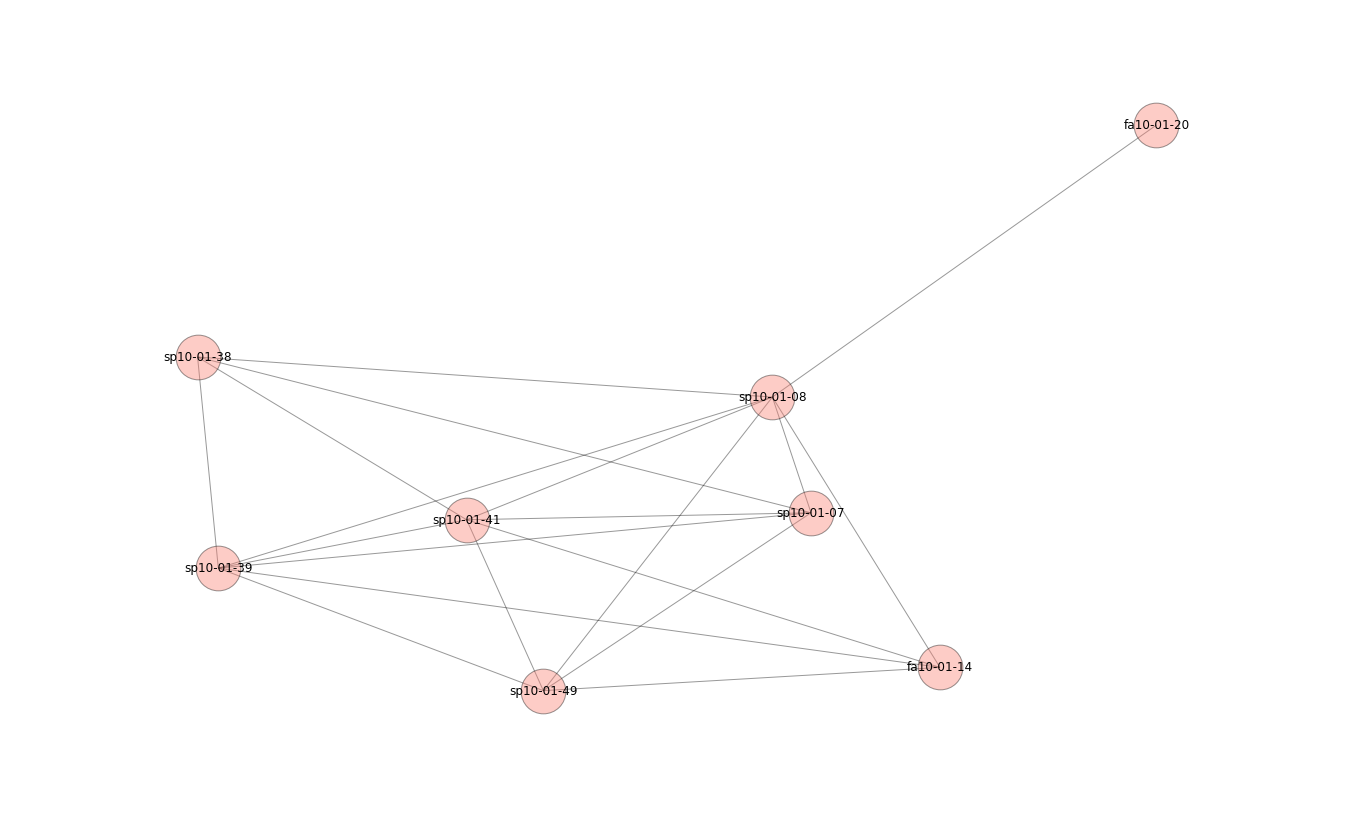

In [89]:
# Plot the graph.
layout = nx.spring_layout(G_directed_unweighted)
nx.draw(G_directed_unweighted, layout, node_color='salmon', alpha=0.4, node_size=2000)
_ = nx.draw_networkx_labels(G_directed_unweighted, layout, node_labels)

#### 4.4.2 Plot the undirected weighted graph

This can typically be utilized to better understand the importance of the various individuals and their interactions in the network.

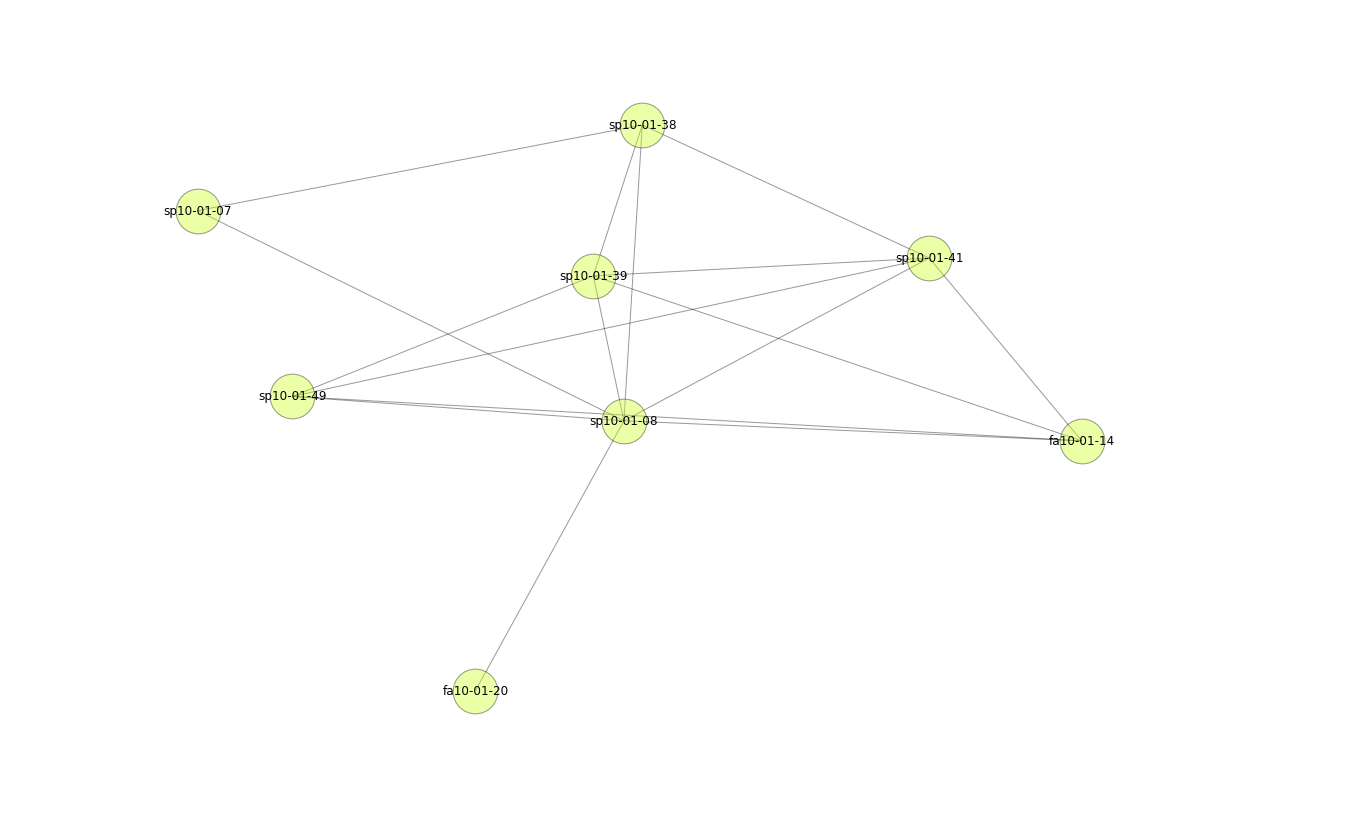

In [91]:
# Plot the graph.
layout = nx.spring_layout(G_directed_unweighted)
nx.draw(G_undirected_weighted, layout, node_color='#CEFF22', alpha=0.4, node_size=2000)
_ = nx.draw_networkx_labels(G_undirected_weighted, layout, node_labels)

> **Note**:

> Can you think of use cases for the various networks introduced in Module 4? 

> Feel free to discuss these with your fellow students on the forums.

# 5. Data error handling
This section demonstrates some of Bandicoot’s error handling and reporting strategies for some of the "faulty" users. Some circumstances may require working with CDR records (and collected mobile phone metadata) that have been corrupted. The reasons for this can be numerous, but typically include wrong formats, faulty files, empty periods of time, and missing users. Bandicoot will not attempt to correct errors, as this might lead to incorrect analyses. Correctness is key in data science, and Bandicoot will:

1. Warn you when you attempt to import corrupted data;
2. Remove faulty records; and
3. Report on more than 30 variables (such as the number of contacts, types of records, records containing location), warning you of potential issues when exporting indicators.

## 5.1 Bandicoot csv import
Importing csv files with Bandicoot will produce warnings about:

1. No files containing data being found in the specified path;
2. The percentage of records missing location information;
3. The number of antennas missing geotags (provided the antenna file has been loaded);
4. The fraction of duplicated records; and
5. The fraction of calls with an overlap bigger than 5 minutes.


In [92]:
# Set the path and user for demonstration purposes.
antenna_file             = '../data/bandicoot/antennas.csv'
attributes_path          = '../data/bandicoot/attributes/'
records_with_errors_path = '../data/bandicoot/records/'
error_user_id            = 'fa10-01-04'

## 5.2 Error example

In [93]:
errors = bc.read_csv(error_user_id, records_with_errors_path )

         call_duration: 1458 record(s) with incomplete values
         No antennas file was given and records are using antennas for position.


[x] 2408 records from 2010-09-20 13:48:57 to 2011-05-23 22:25:08
[x] 54 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network


Review the errors below to quickly get a view of your data set. This example includes warnings that are in addition to the missing location and antenna warnings explained earlier. The new warnings include:

1. Missing values of call duration;
2. Duplicate records; and
3. Overlapping records.

### 5.2.1 Rows with missing values
These rows are prudently  excluded, and their details can be examined using “errors.ignored_records”.

In [94]:
errors.ignored_records

{'all': 1458,
 'call_duration': 1458,
 'correspondent_id': 0,
 'datetime': 0,
 'direction': 0,
 'interaction': 0,
 'location': 0}

### 5.2.2 Duplicated records
 These records are retained by default, but you can change this behavior by adding the parameter “drop_duplicates=True” when loading files.
> **Warning**:

> Exercise caution when using this option. The maximum timestamp resolution is one minute, and some of the records that appear to be duplicates may in fact be distinct text messages, or even, although very unlikely, very short calls. As such, it is generally advised that you examine the records before removing them.

In [95]:
errors = bc.read_csv(error_user_id, records_with_errors_path, drop_duplicates=True)

         call_duration: 1458 record(s) with incomplete values
         No antennas file was given and records are using antennas for position.


[x] 2008 records from 2010-09-20 13:48:57 to 2011-05-23 22:25:08
[x] 54 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network


Warning! 400 duplicated record(s) were removed.


<br>
<div class="alert alert-info">
<b>Exercise 4 Start.</b>
</div>

### Instructions
> When working with data of any size or volume, data error handling can be a complex task.
1. List three important topics to consider when performing data error handling.
2. Provide a short description of your view of the topics to consider. Your answer should be one or two sentences in length, and can be based on an insight that you reached while completing the course material or from previous experience.


Your markdown answer here.

### 1. List three important topics to consider when performing data error handling.

#### Errors frequently occur because of unexpected data values. Therefore data error handling should consider:
>1. Data coversion errors
>2. Expression evaluation errors
>3. Lookup errors

### 2. Provide a short description of your view of the topics to consider.

#### Views to consider are:

> 1.Data coversion errors - which occur if the requested conversion is not supported. But more commonly, if a conversion results in loss of significant digits, the loss of insignificant digits, the truncation of strings, etc. Other examples include situations I have experienced when a data conversion fails because a column contains a string instead of a number, etc. or an insertion into a dataframe column fails because the data is a date and the column has a numeric data type, etc. Hence the importance of doing a Python data type check during early data exploration steps in the exercises of this course.


> 2.Expression evaluation errors - occur if expressions that are evaluated at run time perform invalid operations or become syntactically incorrect because of missing or incorrect data values, eg: because a column value is zero, resulting in a mathematical operation that is not valid. Hence, the importance of removing missing values, that is repeatedly emphasised in this course.


> 3.Lookup errors - which occurs if a lookup operation fails to locate a match in the lookup table. Apart from understanding what the lookup table looks like before coding, another way to handle this is to write error routines around clear data error definitions.

<br>
<div class="alert alert-info">
<b>Exercise 4 End.</b>
</div>

> **Exercise complete**:
    
> This is a good time to "Save and Checkpoint".

# 6. Loading the full data set
In this section, you will load the full “Friends and Family” reality commons data set, and compute all of the metrics (briefly introduced in Section 2.2.3) for all of the users. You need to specify a "flat" directory, containing files where each file corresponds to a single user, as input. It is crucial that the record-file naming convention is being observed (i.e., the names of the files are the user IDs), and that each user's data resides in a separate file.

In [4]:
# View the files in the directory using the operating system list function.
!ls ../data/bandicoot/clean_records/ 

fa10-01-01.csv	fa10-01-27.csv	fa10-01-53.csv	fa10-01-79.csv	sp10-01-29.csv
fa10-01-02.csv	fa10-01-28.csv	fa10-01-54.csv	fa10-01-80.csv	sp10-01-30.csv
fa10-01-03.csv	fa10-01-29.csv	fa10-01-55.csv	fa10-01-81.csv	sp10-01-31.csv
fa10-01-04.csv	fa10-01-30.csv	fa10-01-56.csv	fa10-01-82.csv	sp10-01-32.csv
fa10-01-05.csv	fa10-01-31.csv	fa10-01-57.csv	fa10-01-83.csv	sp10-01-33.csv
fa10-01-06.csv	fa10-01-32.csv	fa10-01-58.csv	fa10-01-85.csv	sp10-01-34.csv
fa10-01-07.csv	fa10-01-33.csv	fa10-01-59.csv	fa10-01-86.csv	sp10-01-35.csv
fa10-01-08.csv	fa10-01-34.csv	fa10-01-60.csv	sp10-01-01.csv	sp10-01-36.csv
fa10-01-09.csv	fa10-01-35.csv	fa10-01-61.csv	sp10-01-02.csv	sp10-01-37.csv
fa10-01-10.csv	fa10-01-36.csv	fa10-01-62.csv	sp10-01-05.csv	sp10-01-38.csv
fa10-01-11.csv	fa10-01-37.csv	fa10-01-63.csv	sp10-01-06.csv	sp10-01-39.csv
fa10-01-12.csv	fa10-01-38.csv	fa10-01-64.csv	sp10-01-07.csv	sp10-01-40.csv
fa10-01-13.csv	fa10-01-39.csv	fa10-01-65.csv	sp10-01-08.csv	sp10-01-41.csv
fa10-01-14.csv	fa10-01-40

## 6.1 Load the files and create a metric
Review the Bandicoot "[utils.all](http://bandicoot.mit.edu/docs/reference/generated/bandicoot.utils.all.html#bandicoot.utils.all)" page for more detail.

In [5]:
# Load libraries and set path options.
import glob, os
records_path    = '../data/bandicoot/clean_records/'

# Create an empty list and then cycle through each of the available files in the directory to add features.
features = []
for f in glob.glob(records_path + '*.csv'):
    user_id = os.path.basename(f)[:-4]

    try:
        B = bc.read_csv(user_id, records_path, attributes_path=attributes_path, describe=False, warnings=False)
        metrics_dict = bc.utils.all(B, summary='extended', split_day=True, split_week=True)
    except Exception as e:
        metrics_dict = {'name': user_id, 'error': str(e)}

    features.append(metrics_dict)

## 6.2 Save the interactions in a file for future use
> **Note**: The application of machine learning techniques, using a similar data set, will be explored in the next notebook.

In [6]:
bc.io.to_csv(features, 'all_features.csv')

Successfully exported 129 object(s) to all_features.csv


Before moving on, take a quick look at the results of the pipeline.

#### 6.2.1 Review the data for the first user
Keep in mind that, in manual approaches, you would likely have to create each of these features by hand. The process entails thinking about features, and reviewing available literature to identify applicable features. These features are used in machine learning techniques (including feature selection) for various use cases.

> **Note**:

> The section below will display a large number of features for the first user. You do not need to review them in detail. Here, the intention is to emphasize the ease of creating features, and the advantages of computationally-optimized functions. These are extremely useful when scaling your analyses to large record sets (such as those typically found in the telecommunications industry).

#### 6.2.2 Review the features list

In [7]:
# Display the length or number of users with in the features list.
len(features)

129

In [8]:
# Print the list of users' names contained in features list 
for u in features:
    print u['name']

sp10-01-45
fa10-01-53
fa10-01-08
fa10-01-07
fa10-01-31
fa10-01-55
fa10-01-40
sp10-01-09
fa10-01-62
sp10-01-32
fa10-01-04
fa10-01-19
sp10-01-26
fa10-01-44
sp10-01-29
fa10-01-41
fa10-01-35
fa10-01-13
fa10-01-11
fa10-01-69
fa10-01-45
sp10-01-56
fa10-01-82
sp10-01-40
sp10-01-48
sp10-01-55
fa10-01-38
sp10-01-41
fa10-01-73
sp10-01-47
fa10-01-01
sp10-01-31
sp10-01-51
sp10-01-25
fa10-01-50
fa10-01-68
sp10-01-07
sp10-01-44
sp10-01-38
fa10-01-79
fa10-01-85
sp10-01-11
fa10-01-76
fa10-01-78
sp10-01-33
fa10-01-77
fa10-01-06
fa10-01-47
fa10-01-64
fa10-01-14
sp10-01-01
fa10-01-10
fa10-01-71
fa10-01-25
fa10-01-36
sp10-01-13
sp10-01-46
fa10-01-17
fa10-01-56
fa10-01-43
fa10-01-57
fa10-01-20
fa10-01-65
fa10-01-05
fa10-01-24
fa10-01-66
fa10-01-23
fa10-01-21
fa10-01-29
fa10-01-15
fa10-01-61
fa10-01-83
sp10-01-02
sp10-01-18
sp10-01-49
fa10-01-34
sp10-01-05
sp10-01-35
fa10-01-70
fa10-01-22
fa10-01-80
sp10-01-22
sp10-01-16
fa10-01-27
fa10-01-72
fa10-01-33
fa10-01-75
fa10-01-60
sp10-01-39
sp10-01-24
sp10-01-12

In [13]:
# Print the various groups of behavioral indicators (and attributes) that are available for each user.
# You will use the first user's data in the feature list for this.
[key  for key,value in features[0].iteritems()]

['name', 'error']

# 7. Submit your notebook

Please make sure that you:
- Perform a final "Save and Checkpoint";
- Download a copy of the notebook in ".ipynb" format to your local machine using "File", "Download as", and "IPython Notebook (.ipynb)"; and
- Submit a copy of this file to the Online Campus.

# 8. References
Aharony, Nadav, Wei Pan, Cory Ip, Inas Khayal, Alex Pentland. 2011. “SocialfMRI: Investigating and shaping social mechanisms in the real world.” Pervasive and Mobile Computing 7:643-659.

Jahani, Eaman, Pal Roe Sundsoy, Johannes Bjelland, Asif Iqbal, Alex Pentland, and Yves-Alexandre de Montjoye. 2015. “Predicting Gender from Mobile Phone Metadata.” Paper presented at the Netmob Conference, Massachusetts Institute of Technology, Cambridge, April 8-10.